# COVID-19 Clinical Trials EDA Project

### Step-1. Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Setting-up Plotting
sns.set(style = 'whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Step-2. Loading the dataset

In [3]:
df = pd.read_csv('/Users/swayamsiddhant/Documents/DATA SCIENCE/Projects/Covid-19 Analysis _Internship/datasets/COVID clinical trials.csv')

### Step-3. Basic Exploration

In [4]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe(include = 'all'))

(5783, 27)
Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results         

### Step-4. Handling Missing Data

In [6]:
missing_data = df.isnull().mean() * 100
print("Missing Data Percentage:\n", missing_data)

#Drop High-missing Columns
df.drop(columns=['Results First Posted', 'Study Documents'], inplace=True)

#Fill specific nulls with a label
df['Acronym'] = df['Acronym'].fillna('Missing Acronym')

#fill all categorical nulls with a placeholder
categorical_cols = df.select_dtypes(include = 'object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(f"Missing {col}", inplace = True)

#Fill Numeric Nulls
df['Enrollment'].fillna(df['Enrollment'].median(), inplace = True)

Missing Data Percentage:
 Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL         

/var/folders/qt/19zg344n0pv5cx9rtxzyvdj40000gn/T/ipykernel_51776/3698808385.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(f"Missing {col}", inplace = True)
/var/folders/qt/19zg344n0pv5cx9rtxzyvdj40000gn/T/ipykernel_51776/3698808385.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

### Step-5. Feature Engineering - Extract Country

In [7]:
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip())

### Step-6. Univariate Analysis

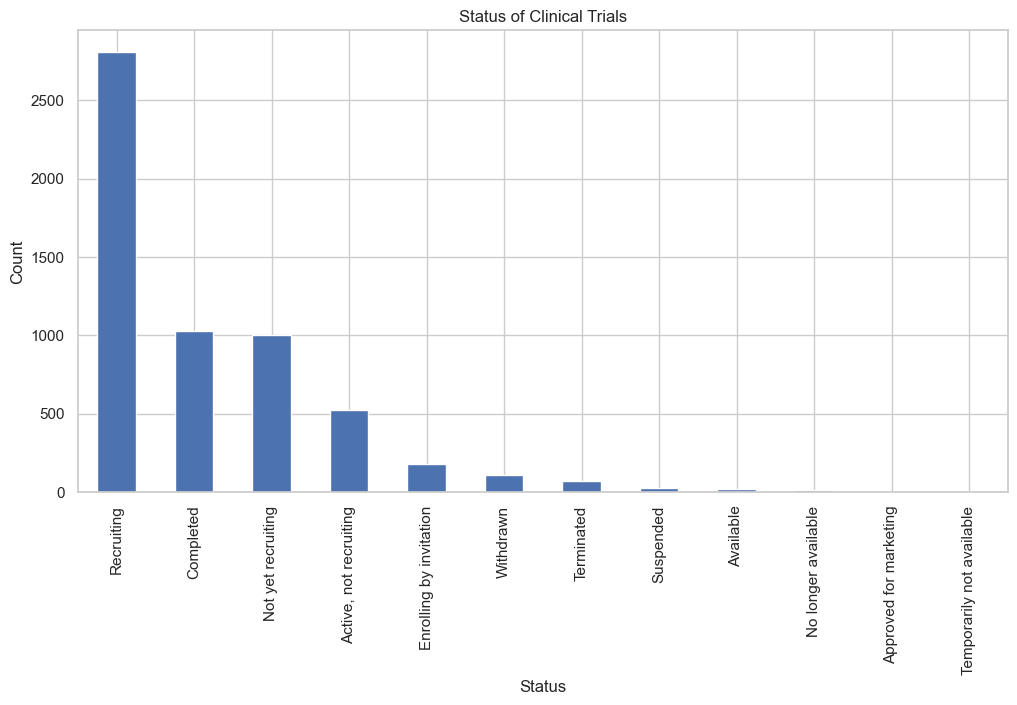

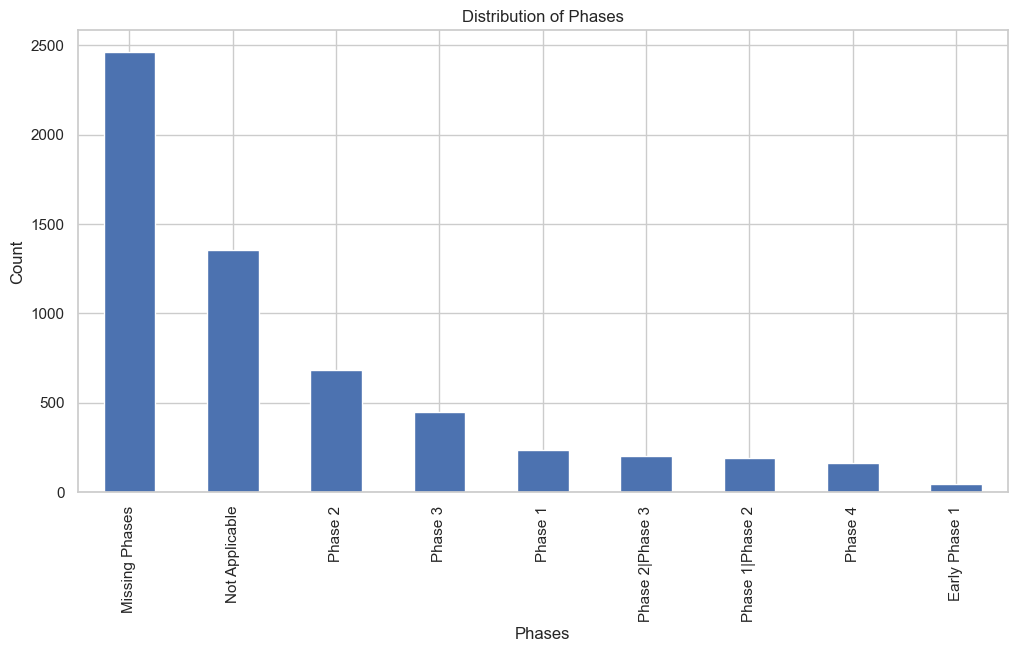

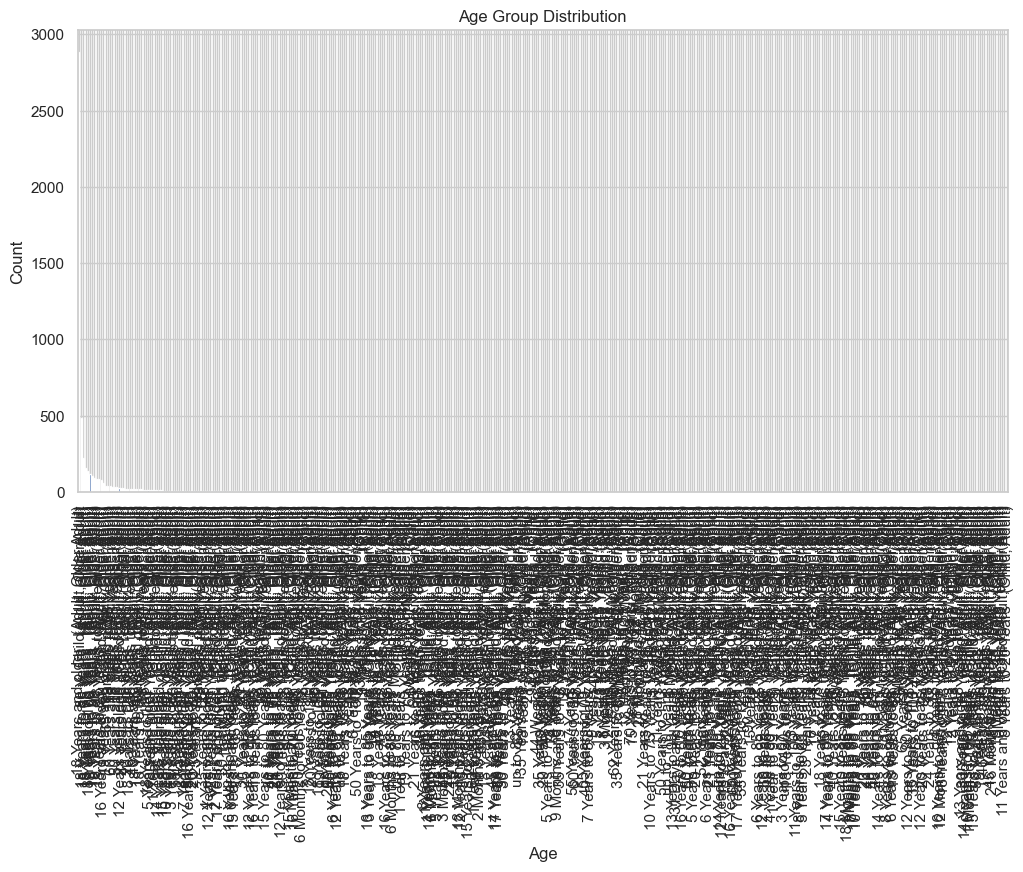

In [11]:
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')
plt.ylabel('Count')
plt.show()

df['Phases'].value_counts().plot(kind = 'bar', title = 'Distribution of Phases')
plt.ylabel('Count')
plt.show()

df['Age'].value_counts().plot(kind = 'bar', title = 'Age Group Distribution')
plt.ylabel('Count')
plt.show()


### Step-7. Bivariate Analysis

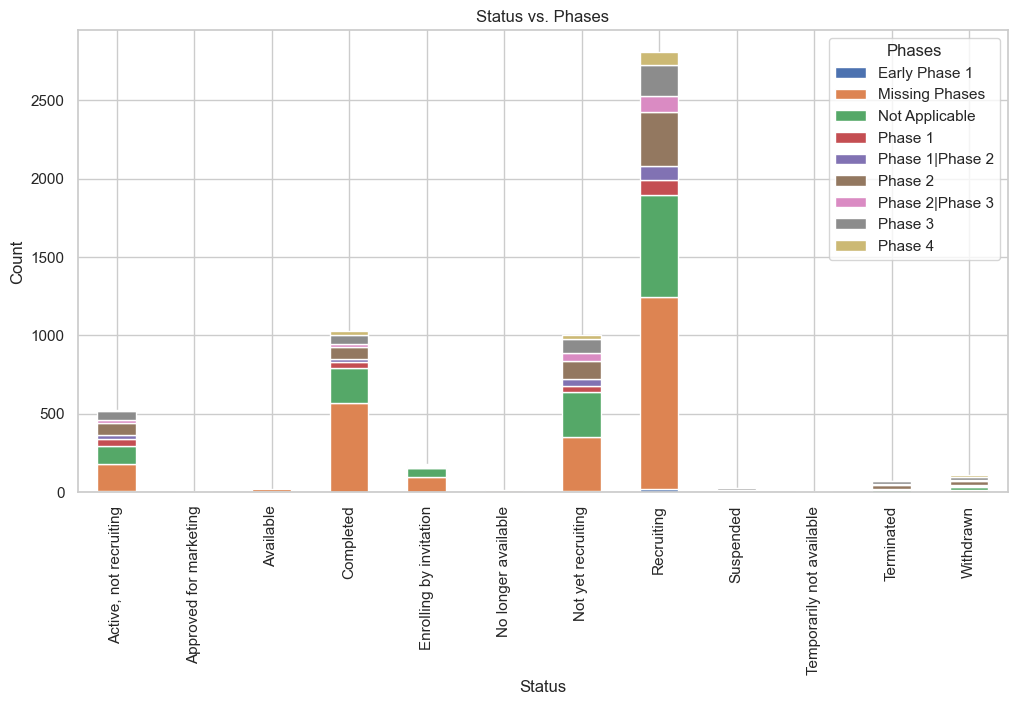

In [12]:
status_phase = pd.crosstab(df['Status'], df['Phases'])
status_phase.plot(kind = 'bar', stacked = True, title = 'Status vs. Phases')
plt.ylabel('Count')
plt.show()

### Step-8. Time Series Analysis

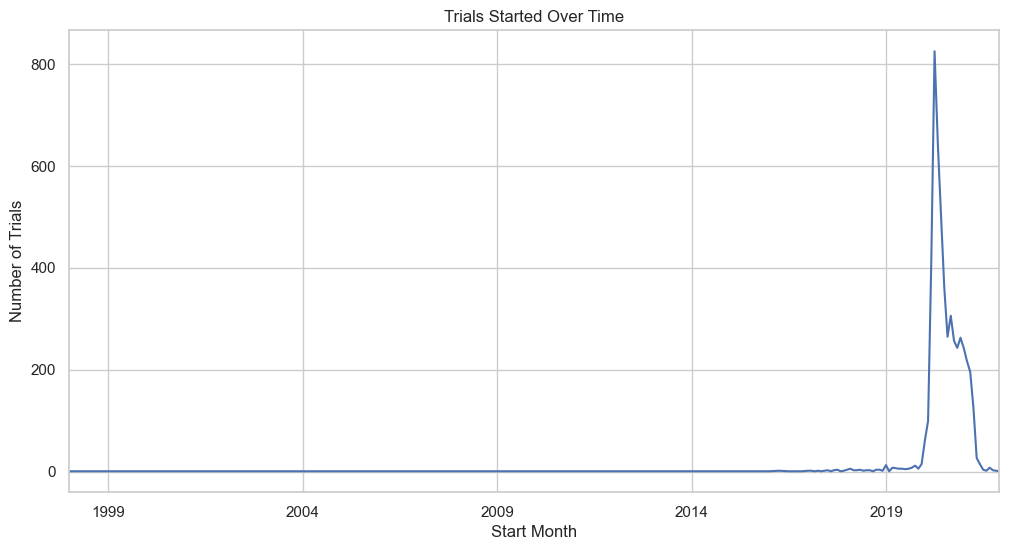

In [13]:
df['Start Date'] = pd.to_datetime(df['Start Date'], errors = 'coerce')
start_trend = df['Start Date'].dt.to_period('M').value_counts().sort_index()
start_trend.plot(kind = 'line', title = 'Trials Started Over Time')
plt.ylabel('Number of Trials')
plt.xlabel('Start Month')
plt.show()

### Step-9. Top Countries by Trials

<function matplotlib.pyplot.show(close=None, block=None)>

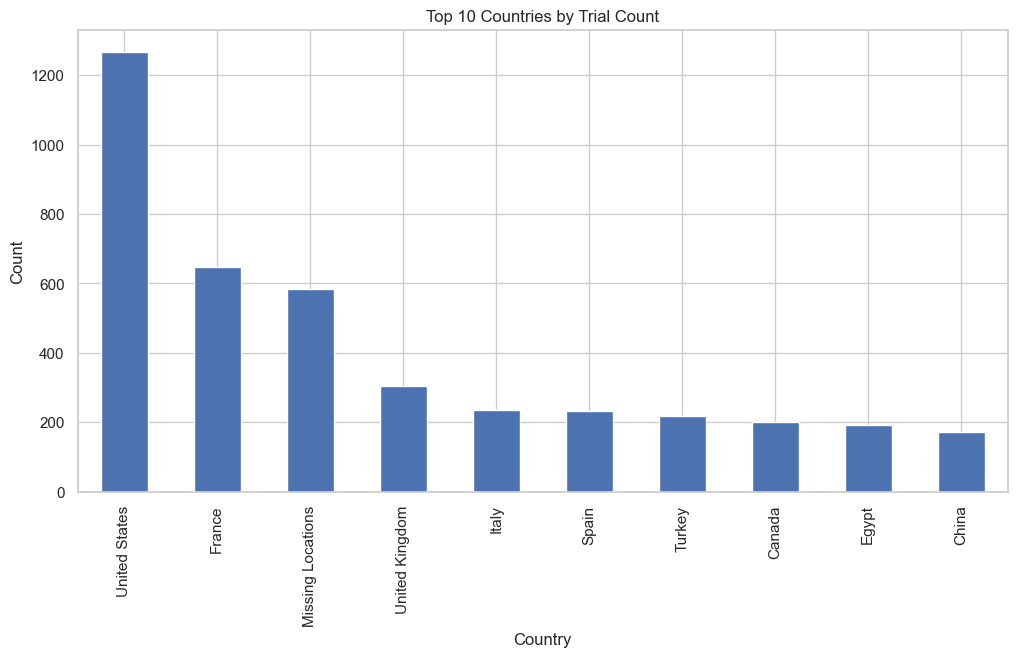

In [14]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind = 'bar', title = 'Top 10 Countries by Trial Count')
plt.ylabel('Count')
plt.show

### Step-10. Save Cleaned Data

In [15]:
df.to_csv('/Users/swayamsiddhant/Documents/DATA SCIENCE/Projects/Covid-19 Analysis _Internship/datasets/COVID clinical trials.csv', index = False)

### Final Information

In [16]:
print(f"Final Shape: {df.shape}")
print(f"Unique NCT Numbers: {df['NCT Number'].nunique()}")
print(f"Unique URLs: {df['URL'].nunique()}")

Final Shape: (5783, 26)
Unique NCT Numbers: 5783
Unique URLs: 5783
